***

# <center><font size="5" color='red'>Name: Muhammad Abdullah Shahid &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;ID: F2019027004</font></center>


# <center><font size="10" color='Blue'>Machine Learning </font></center>


# <center><font size="6" color='Blue'>Assignment 4 Task 3</font></center>


# <center><font size="6" > <i style=" color:#F0CD23">Text Clustering (Optional) </i></font></center>

# <center><font size="5" color='green'>Using K-Means Clustering algorithms </font></center>

***

#  <font color="Red" size=6> Step 1: Import Libraries </font>

In [1]:
import re
import os
import glob
import string
import scipy
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from prettytable import PrettyTable
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from gensim.parsing.preprocessing import remove_stopwords

#  <font color="Red" size=6> Step 2: Read, Understand and Pre-process Train/Test Data </font>

# <font color="green"> Read data from male corpus<font>
    We have some text file which contain some sample data and through these data we will train our model.
    So first we get data from all mail text file and store this data in a variable by using pandas labirary.
    And than we will analyze and do some preprocessing tasks on our train data and represent data through charts for better
    understanding.

In [2]:
male_corpus = []
for files in glob.glob('twitter-gender-corpus/male/*.txt'):
    f = open(files,encoding="utf8") 
    male_corpus.append(f.read())
    f.close()


In [3]:
len(male_corpus)

210

In [4]:
pd.options.display.max_colwidth = 150
male_df = pd.DataFrame(male_corpus,columns=['text'])
male_df

,text
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To..."
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ..."
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ..."
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...
...,...
205,Should be interesting.http://fplus.me/p/f55&nbsp;\nConcept of owning something should include tinkering with it.http://fplus.me/p/flk&nbsp;\nhorro...
206,@R_Lukaku cannot wait to see you at chelsea! from a belgian ex-pat in london\n@farhanlalji it&#39;s unavoidable I guess after a while in Switzerla...
207,"Paid a visit to Lindum Colonia today, better known as Lincoln,the County may have been Gods afterthought to fill some space but the citys ok\n@_Gr..."
208,Viewing my find on #NearMap http://bit.ly/qjLvah&nbsp;\nMy latest SlideShare upload : Hunagi skopje http://slidesha.re/dJ7GWk\nHUNAGI Napló: http:...


# <font color="green"> Read data from female corpus<font>

In [5]:
female_corpus = []

for files in glob.glob('twitter-gender-corpus/female/*.txt'):
    f = open(files,encoding="utf8") 
    female_corpus.append(f.read())
    f.close()

In [6]:
female_df = pd.DataFrame(female_corpus,columns=['text'])
female_df

,text
0,Inspiration juices for today #RussianCosmo #beauty #makeup http://instagr.am/p/RNNtiom7m4/&nbsp;\nBeautiful makeup with Beautiful #maria from #for...
1,"Getting ready for #AOM2011 (@ AOM 2011 Annual Meeting) http://4sq.com/o5iht8\nI love sessions with terms like MOO, MUD, MUSH and MUVE! Sitting in ..."
2,Social Influencers Who Are Changing The World Through Twitter http://www.fastcompany.com/node/3004155&nbsp; via @FastCompany\nLift a glass of wate...
3,Azure Monitor para Windows Phone 7 http://www.estoyenlanube.com/azure-monitor-para-windows-phone-7/&nbsp;…\nhttp://smlk.es/Gt7YCx&nbsp;\nCompleta ...
4,@inesbajo @goroji jajjajja! Lo sé! Gracias SF! :) a 20 min de ver a #Nuka! :)\nVer &quot;Emotional baby! Too cute!&quot; en YouTube - https://www...
...,...
210,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...
211,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp..."
212,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...
213,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know..."


## <center> <font color="blue"> Combile Male and Female Corpus </font> </center> 

In [7]:
twitterCorpus_df = male_df.append(female_df, ignore_index= True)
twitterCorpus_df

,text
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To..."
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ..."
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ..."
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...
...,...
420,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...
421,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp..."
422,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...
423,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know..."


# <font color="green"> Pre-process on all data <font>

## <font color="blue"> Remove Punctuation and Stop Words </font>

In [8]:
pd.options.display.max_colwidth = 150
twitterCorpus_df

,text
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To..."
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ..."
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ..."
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...
...,...
420,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...
421,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp..."
422,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...
423,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know..."


## <center> <font color="blue"> Remove Punctuation </font> </center> 

In [9]:
#Remove Punctuation
twitterCorpus_df.text = twitterCorpus_df.text.str.replace('[^\w\s]','',regex=True)
twitterCorpus_df

,text
0,zulahni Oh honey Don39t force us to stage an intervention Look at your life Look at your choices sassygayfriend\nBrianEnigma Re ARG Tools 21 bad n...
1,lukeniuk Tack män Kul som fan att träffas\nTack själv man riktigt fett att få höra dig köra live MangeHellberg Tigerboys Imtherereasonwhy realkaze...
2,Report from SIGIR 2011 Beijing China httppostly2lpEH amazonmechanicalturk clustering conferencereports crowdsourcing gir\nPeter Jackson A Pers...
3,After quite some time working on different things Running some experiments on content extraction from web documents again\nmight be interesting f...
4,Financial crisis hurting new job seekers in Japan httpwwwyomiuricojpdybusiness20081111TDY04303htm\nUS Students May Seek More Loans as Savings Dwin...
...,...
420,pablomoreiras Exacto eEAmerica\nLo q me encanta d Google RT Alyssa_Milano Google Doodle Honors 50th Anniversary of 39I Have a Dream39 httponmasht...
421,quotChance is like a picture it39d be nice if you39d just take itquot\nI39m at The Juice Press New Yorkhttp4sqcomoc64P0nbsp\nIt39s been a majorly ...
422,How to Recognize a Hipster Your server has a full beard and is wearing a beanie httptumblrcomxrn47n6ngynbsp\nGloria Ferrera Blanc de Blancs In t...
423,rigbysdeli thanks so much Info sent\nA moto for work pals and play Doodle by dineensparish httpinstagramcompafzwlgxT94nbsp\nyou know when you are ...


## <center> <font color="blue"> Remove stopWords </font> </center> 

In [10]:
# Remove stopWords
twitterCorpus_df.text = twitterCorpus_df.text.map( lambda x: remove_stopwords(x))
twitterCorpus_df

,text
0,zulahni Oh honey Don39t force stage intervention Look life Look choices sassygayfriend BrianEnigma Re ARG Tools 21 bad news HTML entity actually q...
1,lukeniuk Tack män Kul som fan att träffas Tack själv man riktigt fett att få höra dig köra live MangeHellberg Tigerboys Imtherereasonwhy realkazey...
2,Report SIGIR 2011 Beijing China httppostly2lpEH amazonmechanicalturk clustering conferencereports crowdsourcing gir Peter Jackson A Personal Obitu...
3,After time working different things Running experiments content extraction web documents interesting arifah77 RT danielequercia RT LouWoodley How ...
4,Financial crisis hurting new job seekers Japan httpwwwyomiuricojpdybusiness20081111TDY04303htm US Students May Seek More Loans Savings Dwindle htt...
...,...
420,pablomoreiras Exacto eEAmerica Lo q encanta d Google RT Alyssa_Milano Google Doodle Honors 50th Anniversary 39I Have Dream39 httponmashto147ZjEHnb...
421,quotChance like picture it39d nice you39d itquot I39m The Juice Press New Yorkhttp4sqcomoc64P0nbsp It39s majorly productive day work thanks quotFo...
422,How Recognize Hipster Your server beard wearing beanie httptumblrcomxrn47n6ngynbsp Gloria Ferrera Blanc Blancs In glass Color Creamy orange citrus...
423,rigbysdeli thanks Info sent A moto work pals play Doodle dineensparish httpinstagramcompafzwlgxT94nbsp know having days think head actually fall M...


## <center> <font color="blue"> Define a function for cleane the data </font> </center> 

In [11]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def clean_text(text):
     #Remove URLs
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'https?://.*?\\s+', '', text, flags=re.MULTILINE)
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text=pattern.sub('', text)
    #re.sub(r'(\s)http\w+', r'\1',text )
    #Remove long words
    longword = re.compile(r'\W*\b\w{15,500}\b')
    text=longword.sub('', text)
    #Remove short words
    shortword = re.compile(r'\W*\b\w{1,3}\b')
    text=shortword.sub('', text)
#remove emojis from text
    text = deEmojify(text)

    # lower capitalization
    text=text.lower()
    
    # Remove punctuation 
    remove = string.punctuation
    remove = remove.replace("@", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    text=re.sub(pattern, "", text) 
    
    #Remove username
    text=re.sub(r'@.*?(?=\s)', '', text)
    #Remove digits
    text = ''.join([i for i in text if not i.isdigit()])

    return text

## <center> <font color="blue"> Cleane data using user define function </font> </center> 

In [12]:
twitterCorpus_df.text = twitterCorpus_df.text.map( lambda x: clean_text(x))
twitterCorpus_df

,text
0,zulahni honey dont force stage intervention look life look choices sassygayfriend brianenigma tools news html entity actually quotequot htmlisweir...
1,lukeniuk tack trffas tack sjlv riktigt fett hra kra live mangehellberg tigerboys realkazey mangehellberg fr tuff mitt eget bsta brs eller atelierg...
2,report sigir beijing china clustering crowdsourcing peter jackson personal obituary obituaries people facebook uses natural language processing t...
3,after time working different things running experiments content extraction documents interesting arifah danielequercia louwoodley people twitter p...
4,financial crisis hurting seekers japan students seek more loans savings dwindle programs world queueing this probably delicious article harvard pr...
...,...
420,pablomoreiras exacto eeamerica encanta google alyssamilano google doodle honors th anniversary have dream mashable nstlbcn greater progress desire...
421,quotchance like picture itd nice youd itquot im juice press its majorly productive work thanks quotfountain youthquot smoothie drank morning live ...
422,recognize hipster your server beard wearing beanie gloria ferrera blanc blancs glass color creamy orange citrus consistency smooth small cities l...
423,rigbysdeli thanks info sent moto work pals play doodle dineensparish know having days think head actually fall mine actually today breathe sertone...


In [13]:
twitterCorpus_df.shape

(425, 1)

#  <font color="Red" size=6> Step 3: Feature Extraction</font> <font color="Red" size="5">(Content based Methods)</font>

### Use TfidfVectorizer for convert text data into feature vectors

#### Set ngram_range=(3,7) and analyzer='char' because we find in Assignment 4 Task1 that is the best attribute for this dataset

In [14]:
TfidfVectorizer_N7 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(3,7),
                             max_features=8000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",TfidfVectorizer_N7)

tfidf_matrix = TfidfVectorizer_N7.fit_transform(twitterCorpus_df['text']).todense()
print("\nShape of this feature vactore: ", tfidf_matrix.shape)
feature = pd.DataFrame(tfidf_matrix, columns=TfidfVectorizer_N7.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(analyzer='char', max_features=8000, ngram_range=(3, 7),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ysi,yst,yste,yti,za,ze,zin,zing,zing,zon
0,0.002710,0.002941,0.022335,0.005317,0.000692,0.004935,0.014877,0.003367,0.011856,0.011856,...,0.000791,0.001975,0.002290,0.000822,0.005215,0.003094,0.003485,0.003824,0.003843,0.002132
1,0.001122,0.000000,0.008598,0.001834,0.000000,0.002188,0.008004,0.001393,0.008433,0.008433,...,0.001636,0.003405,0.001579,0.000851,0.000000,0.001280,0.001202,0.000659,0.000663,0.002941
2,0.003244,0.000978,0.017963,0.007858,0.005066,0.002344,0.002375,0.002687,0.000000,0.000000,...,0.015778,0.005691,0.005583,0.025162,0.000000,0.004938,0.004250,0.004662,0.004685,0.004725
3,0.005291,0.004306,0.018760,0.012111,0.011491,0.001376,0.008133,0.005916,0.002170,0.002170,...,0.021614,0.015421,0.013410,0.000803,0.000000,0.001812,0.002835,0.003110,0.003126,0.002081
4,0.004475,0.003035,0.020906,0.010365,0.009290,0.000728,0.003071,0.001390,0.002294,0.002294,...,0.004081,0.002038,0.002363,0.005093,0.000000,0.006385,0.001798,0.001973,0.001983,0.001467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.029224,0.000000,0.004001,0.000000,0.000000,0.000000,0.004584,0.005186,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004474,0.004909,0.004933,0.000000
421,0.008655,0.002515,0.006517,0.002695,0.001580,0.000804,0.003394,0.001536,0.002535,0.002535,...,0.004510,0.000751,0.000870,0.003752,0.001699,0.003529,0.014576,0.013084,0.013149,0.000000
422,0.000000,0.000000,0.007692,0.005833,0.003418,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003250,0.000000,0.000000,0.000000,0.006109,0.014338,0.015730,0.015808,0.000000
423,0.003088,0.001197,0.016063,0.005289,0.001691,0.004016,0.009202,0.002192,0.006030,0.006030,...,0.001287,0.000000,0.000000,0.001339,0.001819,0.011581,0.018910,0.020227,0.019806,0.002313


# <center><font size="8" > <i style=" color:#F0CD23">Text Clustering </i> </font></center>

##  <font color="Red" size=6> Step 4: Clustering unlabeled data in 2 groups</font>  <font color="Red" size="5">(n_clusters=2)</font> 

Use two clustering algorithm:
1. K-means clustering 
2. MiniBatchKMeans 
 
 Try each algorithm one by one and predict the positive and negitive instance in our data and pass tf-idf matrix for prediction. after that we will train some model and find the pridction and measure the model accuracy. 
 
## <center> <font color="blue"> 1. K-means clustering  </font> </center> 


In [15]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
km.fit(tfidf_matrix)
km_clusters = km.labels_.tolist()


In [16]:
len(km_clusters)

425

In [17]:
from collections import Counter

count = Counter(km_clusters)
print(count)
print("\nNumber of positive instances:", count[1])
print("\nNumber of negative instances:",  count[0])

Counter({1: 280, 0: 145})

Number of positive instances: 280

Number of negative instances: 145


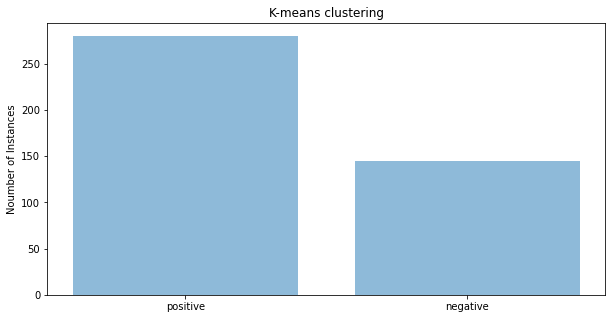

In [18]:
plt.figure(figsize=(10,5))

objects = ('positive', 'negative')
y_pos = np.arange(len(objects))
performance = [count[1], count[0]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Noumber of Instances')
plt.title('K-means clustering');


 ## <center> <font color="blue"> 2. MiniBatchKMeans   </font> </center> 

In [19]:
from sklearn.cluster import MiniBatchKMeans

mbkm = MiniBatchKMeans(n_clusters = 2, batch_size=2048 )
mbkm.fit(tfidf_matrix)
mbkm_clusters = mbkm.labels_.tolist()


In [20]:
len(mbkm_clusters)

425

In [21]:
from collections import Counter

count = Counter(mbkm_clusters)
print(count)
print("\nNumber of positive instances:", count[1])
print("\nNumber of negative instances:",  count[0])

Counter({1: 287, 0: 138})

Number of positive instances: 287

Number of negative instances: 138


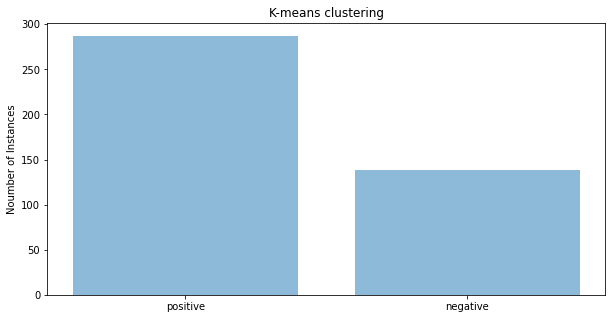

In [22]:
plt.figure(figsize=(10,5))

objects = ('positive', 'negative')
y_pos = np.arange(len(objects))
performance = [count[1], count[0]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Noumber of Instances')
plt.title('K-means clustering');

In [23]:
leGender = LabelEncoder()
print(leGender.fit_transform(['male', 'female']))

[1 0]


#  <font color="Red" size=6> Step 5 and 6: Train ML Algorithms and Evaluate ML Algorithms </font>

## <center> <font color="blue"> Create a DataFrame to store all models Pridiction by all feature vactor </font> </center> 

In [24]:
prediction = pd.DataFrame(columns=['Model Name', 'Clustering', 'Accuracy', 'Error'])
prediction

,Model Name,Clustering,Accuracy,Error


### <font color="green"> Now split train and test data and attach these clusters as leble with the train and test data <font>

###  <font color="green"> Create a function for Train 6 different ML Algorithms on this dataset and store their prediction in a dataframe </font> 

In [25]:


def trainModels(vectorInput, lableOutput, clus):
    trainData_input, testData_input, trainData_output, testData_output = train_test_split(
                                                                                        vectorInput,
                                                                                        lableOutput,
                                                                                        test_size=0.33,
                                                                                        random_state=42
                                                                                        )
    
    global prediction
    new_row = { }


    # train and predict from Model 1
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier()
    rfc.fit(trainData_input ,trainData_output)
    predict = rfc.predict(testData_input)

    new_row['Model Name'] = 'RandomForestClassifier'
    new_row['Clustering'] = clus
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)




    # train and predict from Model 2
    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()
    bnb.fit(trainData_input ,trainData_output)
    predict = bnb.predict(testData_input)

    new_row['Model Name'] = 'BernoulliNB'
    new_row['Clustering'] = clus
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)




    # train and predict from Model 3
    from sklearn.tree import ExtraTreeClassifier
    extTC = ExtraTreeClassifier()
    extTC.fit(trainData_input ,trainData_output)
    predict = extTC.predict(testData_input)

    new_row['Model Name'] = 'ExtraTreeClassifier'
    new_row['Clustering'] = clus
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)




    # train and predict from Model 4
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(trainData_input ,trainData_output)
    predict = gnb.predict(testData_input)

    new_row['Model Name'] = 'GaussianNB'
    new_row['Clustering'] = clus
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)



    # train and predict from Model 5
    from sklearn.linear_model import RidgeClassifierCV
    ridcCV = RidgeClassifierCV()
    ridcCV.fit(trainData_input ,trainData_output)
    predict = ridcCV.predict(testData_input)
    
    new_row['Model Name'] = 'RidgeClassifierCV'
    new_row['Clustering'] = clus
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)



    # train and predict from Model 5
    from sklearn.linear_model import RidgeClassifier
    ridcCV = RidgeClassifierCV()
    ridcCV.fit(trainData_input ,trainData_output)
    predict = ridcCV.predict(testData_input)

    new_row['Model Name'] = 'RidgeClassifier'
    new_row['Clustering'] = clus
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)
    
    
    

## <center> <font color="blue"> Trains model on K-means clustering </font> </center>

In [26]:
trainModels(tfidf_matrix, km_clusters, 'K-means')

In [27]:
prediction

,Model Name,Clustering,Accuracy,Error
0,RandomForestClassifier,K-means,95,4
1,BernoulliNB,K-means,79,20
2,ExtraTreeClassifier,K-means,82,17
3,GaussianNB,K-means,81,18
4,RidgeClassifierCV,K-means,92,7
5,RidgeClassifier,K-means,92,7


## <center> <font color="blue"> Trains model on MiniBatchKMeans clustering </font> </center>

In [28]:
trainModels(tfidf_matrix, mbkm_clusters, 'MiniBatchKMeans')

In [29]:
prediction

,Model Name,Clustering,Accuracy,Error
0,RandomForestClassifier,K-means,95,4
1,BernoulliNB,K-means,79,20
2,ExtraTreeClassifier,K-means,82,17
3,GaussianNB,K-means,81,18
4,RidgeClassifierCV,K-means,92,7
5,RidgeClassifier,K-means,92,7
6,RandomForestClassifier,MiniBatchKMeans,95,4
7,BernoulliNB,MiniBatchKMeans,78,21
8,ExtraTreeClassifier,MiniBatchKMeans,85,14
9,GaussianNB,MiniBatchKMeans,83,16


#  <font color="Red" size=6> Step 7: Selection of Best Model </font>

In [30]:
prediction.shape

(12, 4)

In [31]:
from tabulate import tabulate

prediction = prediction.convert_dtypes()
prediction_table = prediction.copy()
prediction_table = prediction_table.sort_values(by=['Accuracy'], ascending=False)
prediction_table = prediction_table.reset_index(drop=True)
prediction_table.index += 1 
prediction_table.Accuracy = prediction_table.Accuracy.astype(str) + '%'
prediction_table.Error = prediction_table.Error.astype(str) + '%'

print(tabulate(prediction_table, headers='keys', tablefmt='psql'))


+----+------------------------+-----------------+------------+---------+
|    | Model Name             | Clustering      | Accuracy   | Error   |
|----+------------------------+-----------------+------------+---------|
|  1 | RandomForestClassifier | K-means         | 95%        | 4%      |
|  2 | RandomForestClassifier | MiniBatchKMeans | 95%        | 4%      |
|  3 | RidgeClassifierCV      | K-means         | 92%        | 7%      |
|  4 | RidgeClassifier        | K-means         | 92%        | 7%      |
|  5 | RidgeClassifierCV      | MiniBatchKMeans | 92%        | 7%      |
|  6 | RidgeClassifier        | MiniBatchKMeans | 92%        | 7%      |
|  7 | ExtraTreeClassifier    | MiniBatchKMeans | 85%        | 14%     |
|  8 | GaussianNB             | MiniBatchKMeans | 83%        | 16%     |
|  9 | ExtraTreeClassifier    | K-means         | 82%        | 17%     |
| 10 | GaussianNB             | K-means         | 81%        | 18%     |
| 11 | BernoulliNB            | K-means         | 7

# <center> <font color="blue"> Show model perfomance through graphs </font> </center>

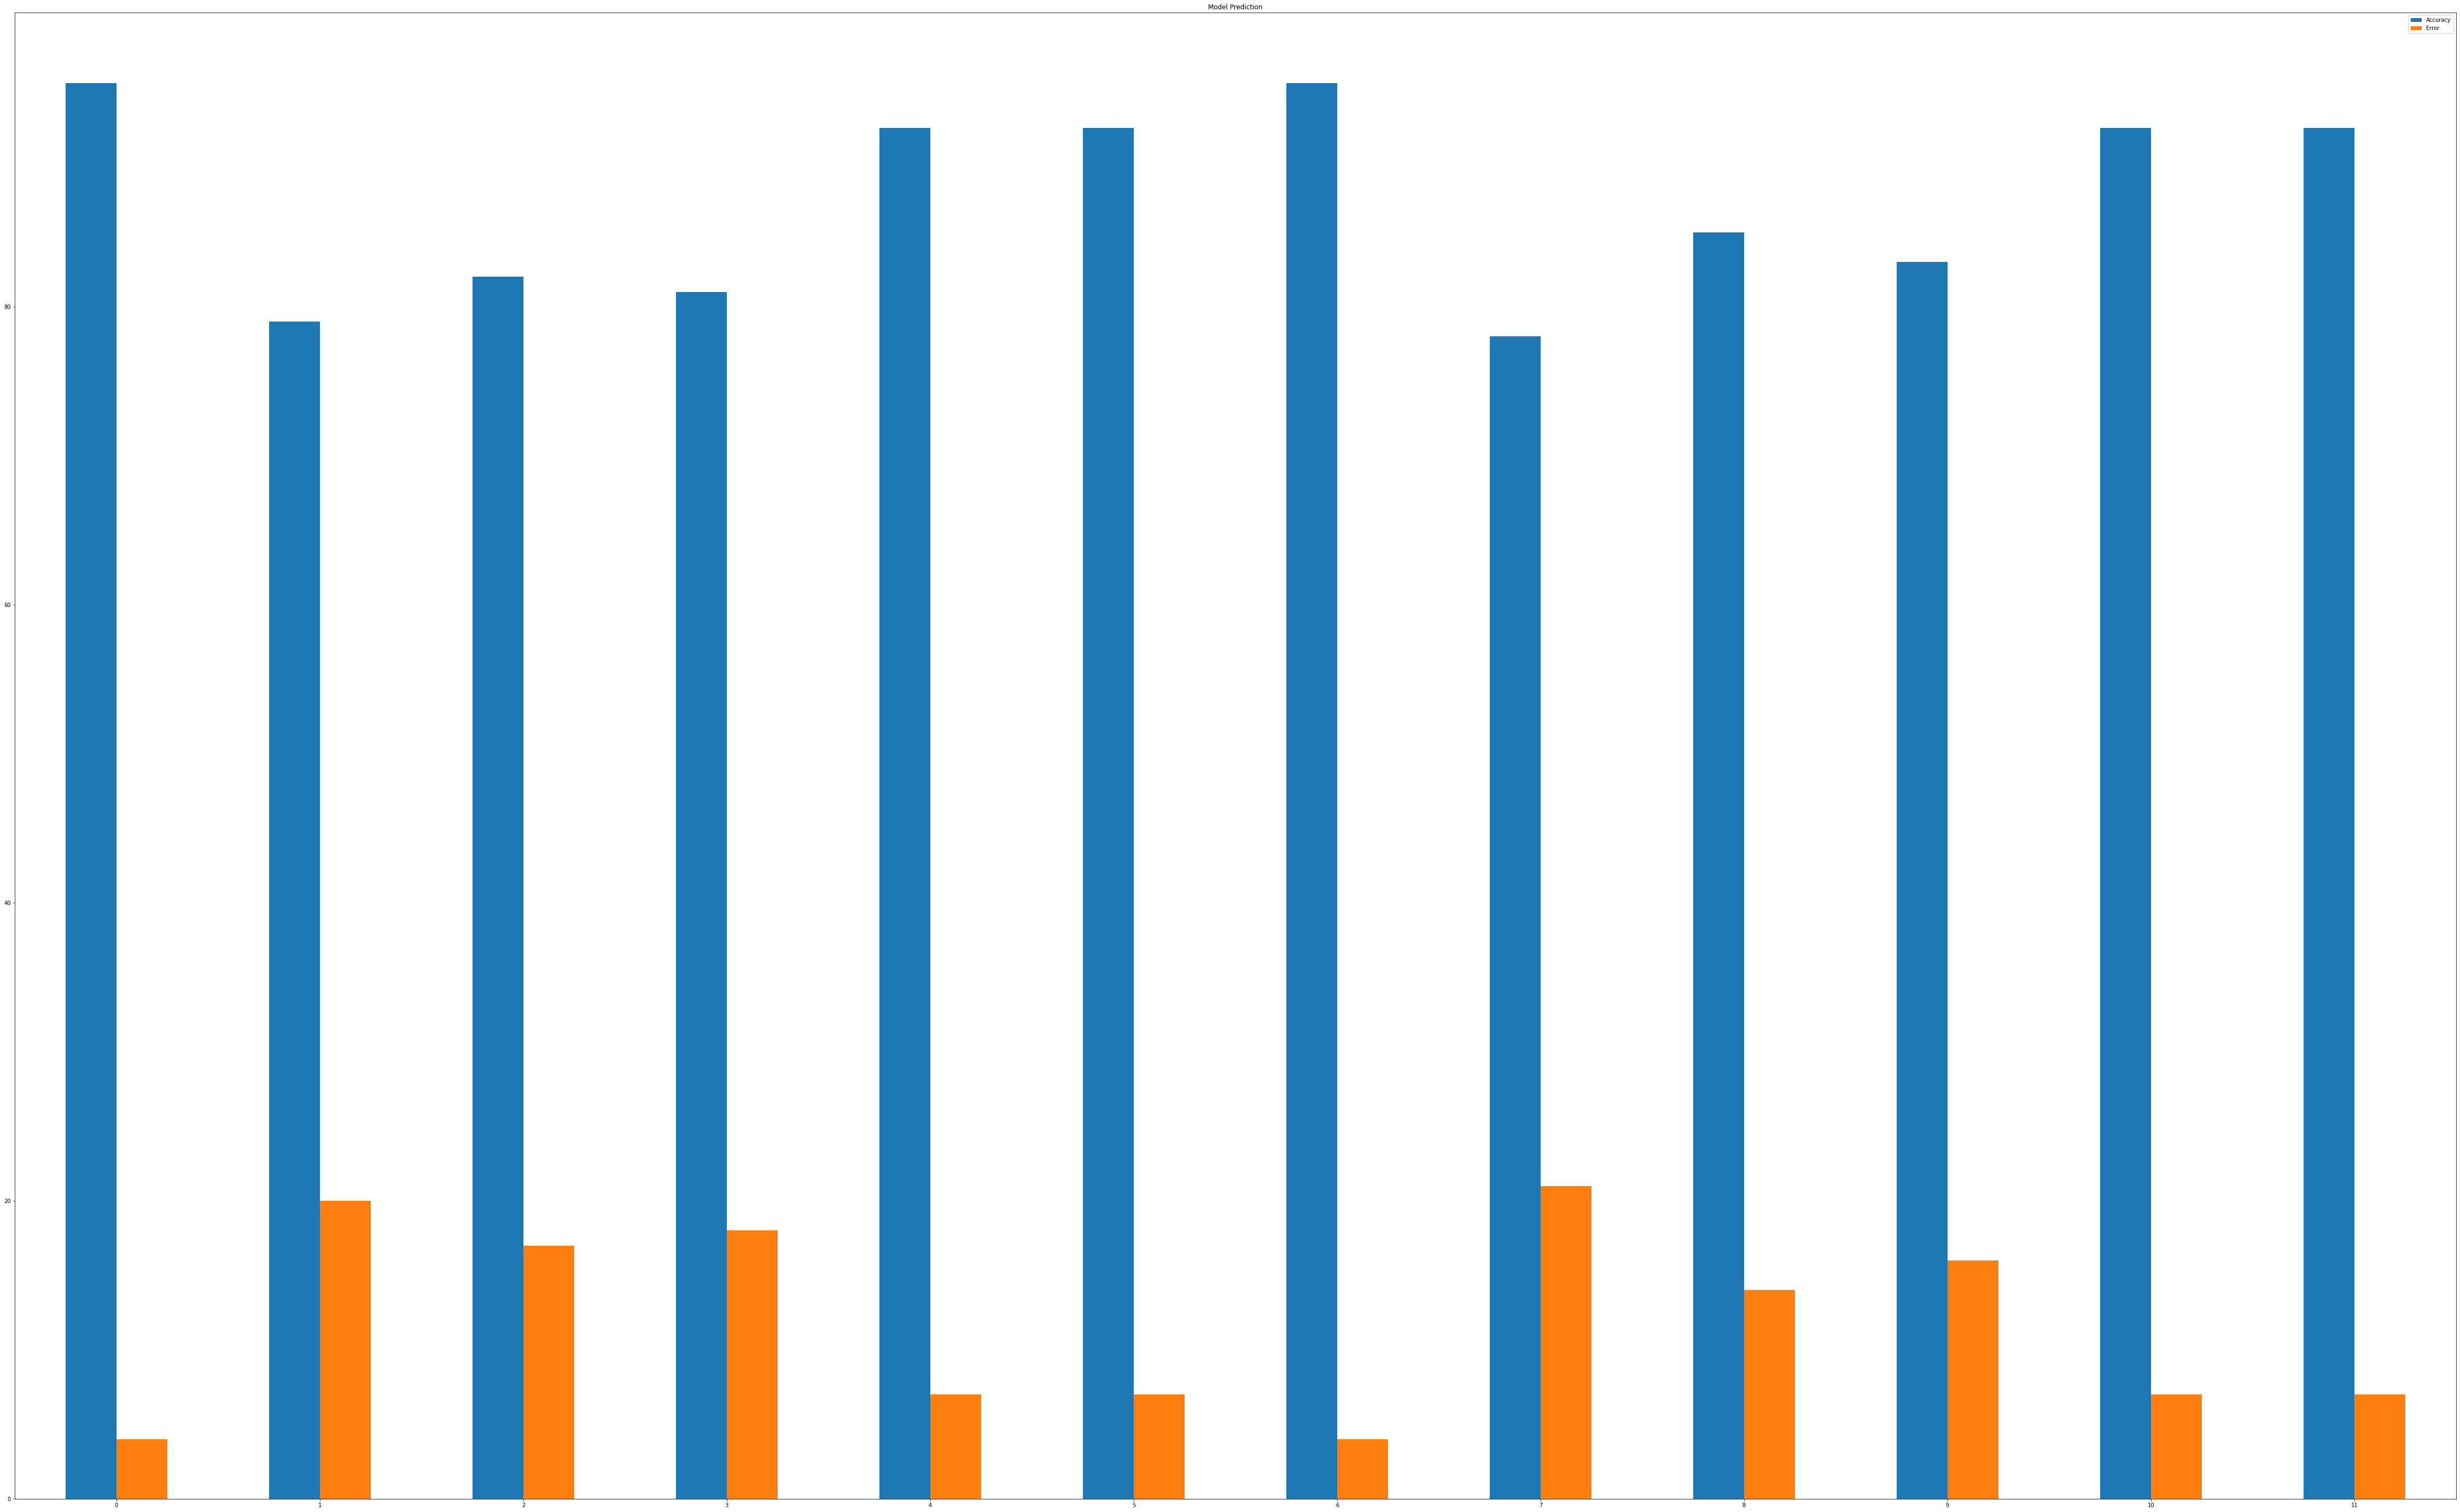

In [32]:
prediction.plot.bar(rot=0 ,title="Model Prediction", figsize=(80, 50));


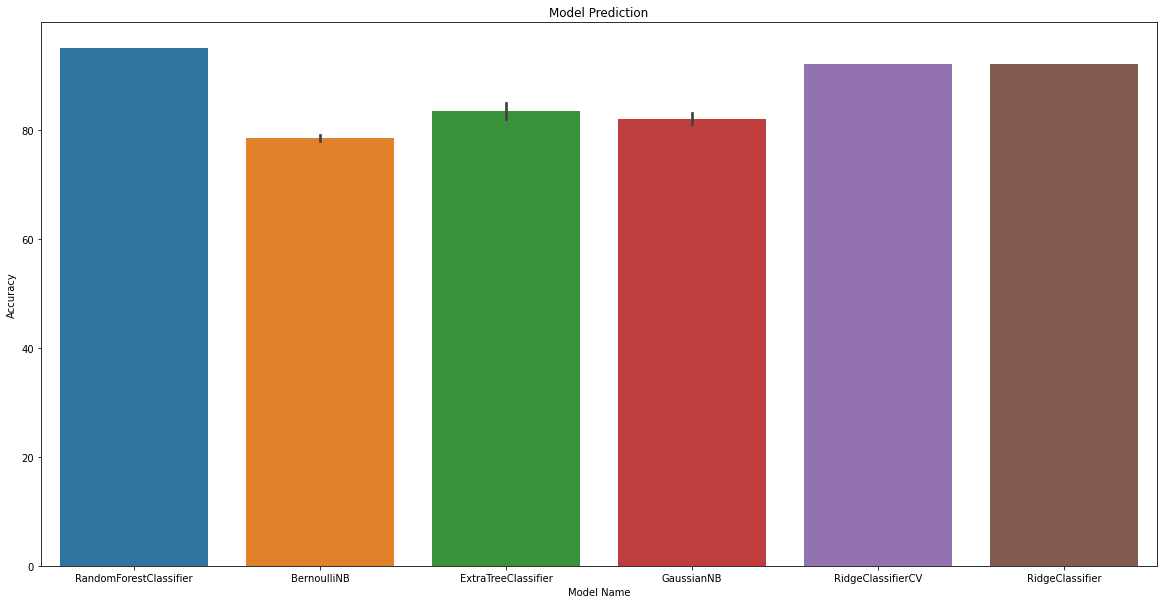

In [33]:
fig = plt.figure(figsize=(20,10))
bar_plot = sns.barplot(y=prediction.Accuracy, x=prediction["Model Name"])

# for item in bar_plot.get_xticklabels():
#     item.set_rotation(90)

#plt.xticks(rotation=180, ha='right')
#plt.xticks(rotation='horizontal')
plt.title("Model Prediction");


# <center> <font color="blue"> Best Model </font> </center>

In [34]:
print("\n\t\t\t\tAll Models Predictions\n")
print(tabulate(prediction_table, headers='keys', tablefmt='psql'))
print("\n\n\t\t\t\tBest Model\n")
print(tabulate(prediction[prediction.Accuracy == prediction.Accuracy.max()], headers='keys', tablefmt='psql'))



				All Models Predictions

+----+------------------------+-----------------+------------+---------+
|    | Model Name             | Clustering      | Accuracy   | Error   |
|----+------------------------+-----------------+------------+---------|
|  1 | RandomForestClassifier | K-means         | 95%        | 4%      |
|  2 | RandomForestClassifier | MiniBatchKMeans | 95%        | 4%      |
|  3 | RidgeClassifierCV      | K-means         | 92%        | 7%      |
|  4 | RidgeClassifier        | K-means         | 92%        | 7%      |
|  5 | RidgeClassifierCV      | MiniBatchKMeans | 92%        | 7%      |
|  6 | RidgeClassifier        | MiniBatchKMeans | 92%        | 7%      |
|  7 | ExtraTreeClassifier    | MiniBatchKMeans | 85%        | 14%     |
|  8 | GaussianNB             | MiniBatchKMeans | 83%        | 16%     |
|  9 | ExtraTreeClassifier    | K-means         | 82%        | 17%     |
| 10 | GaussianNB             | K-means         | 81%        | 18%     |
| 11 | BernoulliNB    

#  <font color="Red" size=6> Step 8: Application Phase </font>


# <center> <font color="blue"> Combine all data and train best model on all data </font> </center>
# <center> <font color="blue"> Train best model on K-means Clustering </font> </center>

In [35]:
print("\nCombine Train Data Input:")

print("\nShape of this feature vactore: ", tfidf_matrix.shape)
feature = pd.DataFrame(tfidf_matrix, columns=TfidfVectorizer_N7.get_feature_names())
feature


Combine Train Data Input:

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ysi,yst,yste,yti,za,ze,zin,zing,zing,zon
0,0.002710,0.002941,0.022335,0.005317,0.000692,0.004935,0.014877,0.003367,0.011856,0.011856,...,0.000791,0.001975,0.002290,0.000822,0.005215,0.003094,0.003485,0.003824,0.003843,0.002132
1,0.001122,0.000000,0.008598,0.001834,0.000000,0.002188,0.008004,0.001393,0.008433,0.008433,...,0.001636,0.003405,0.001579,0.000851,0.000000,0.001280,0.001202,0.000659,0.000663,0.002941
2,0.003244,0.000978,0.017963,0.007858,0.005066,0.002344,0.002375,0.002687,0.000000,0.000000,...,0.015778,0.005691,0.005583,0.025162,0.000000,0.004938,0.004250,0.004662,0.004685,0.004725
3,0.005291,0.004306,0.018760,0.012111,0.011491,0.001376,0.008133,0.005916,0.002170,0.002170,...,0.021614,0.015421,0.013410,0.000803,0.000000,0.001812,0.002835,0.003110,0.003126,0.002081
4,0.004475,0.003035,0.020906,0.010365,0.009290,0.000728,0.003071,0.001390,0.002294,0.002294,...,0.004081,0.002038,0.002363,0.005093,0.000000,0.006385,0.001798,0.001973,0.001983,0.001467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.029224,0.000000,0.004001,0.000000,0.000000,0.000000,0.004584,0.005186,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004474,0.004909,0.004933,0.000000
421,0.008655,0.002515,0.006517,0.002695,0.001580,0.000804,0.003394,0.001536,0.002535,0.002535,...,0.004510,0.000751,0.000870,0.003752,0.001699,0.003529,0.014576,0.013084,0.013149,0.000000
422,0.000000,0.000000,0.007692,0.005833,0.003418,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003250,0.000000,0.000000,0.000000,0.006109,0.014338,0.015730,0.015808,0.000000
423,0.003088,0.001197,0.016063,0.005289,0.001691,0.004016,0.009202,0.002192,0.006030,0.006030,...,0.001287,0.000000,0.000000,0.001339,0.001819,0.011581,0.018910,0.020227,0.019806,0.002313


In [36]:
print("\nCombine Train Data Output:\n")
print(km_clusters)


Combine Train Data Output:

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1

# <center> <font color="blue"> Train best model on all data </font> </center>

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(tfidf_matrix ,km_clusters);


In [38]:
# <center> <font color="blue"> Save Train Model and Vectorizer  </font> </center>

# output = open('TfidfVectorizer_N7.pkl', 'wb')
# pickle.dump(TfidfVectorizer_N7, output)
# output.close()
# output = open('rfc.sav', 'wb')
# pickle.dump(rfc, output)
# output.close()


# #Load Train Model and Vectorizer
# Feature_Vectorizer_N7 = pickle.load(open('TfidfVectorizer_N7.pkl', 'rb'))
# best_model = pickle.load(open('rfc.sav', 'rb'))


#  <font color="Red" size=6> Step 9: Take Input from User </font>

# <center> <font color="blue"> Define a function that will predict the output </font> </center>

In [39]:
def modelPredictionOnUnseenData():
    txt = input("Please Enter Your Input:\n")
    print('\n\n\n=============================================================================================\n\n')

    txt = txt.replace('[^\w\s]','')
    txt = remove_stopwords(txt)
    txt = clean_text(txt)
    print("Input after Preprocessing:\n\n",txt)
    txt = [txt]


    txt = pd.DataFrame(txt, columns=['text'])
    new_data = twitterCorpus_df.copy()
    new_data = new_data.append(txt ,ignore_index = True)

    #cinvert userinput into Feature vector
    vectorFeature = TfidfVectorizer_N7.fit_transform(twitterCorpus_df['text']).todense()
    vectorFeature = vectorFeature[-1]
    print("\n\n\nConvert User input into Feature Vector:\n", vectorFeature)
    predict = rfc.predict(vectorFeature)
    predict = leGender.inverse_transform(predict)

    print("\n\n\nPredicted Output Is:")        
    #show output in pretty table
    x = PrettyTable()
    x.field_names = ["Model's Prediction"]
    x.add_row([predict])
    print(x)
    print('\n\n\n')

# <center> <font color="green"> Take input from User </font> </center>

In [40]:
modelPredictionOnUnseenData()

Please Enter Your Input:
Burger King is testing delivery service. Bloomberg says there are four locations in Virgin... Visa launches digital credit card: Visa's digital wallet is now available on some smartphones. When doing your taxes this year, you can save time and maybe some mo...





Input after Preprocessing:

 burger king testing delivery service bloomberg says locations virgin visa launches digital credit card visa digital wallet available smartphones when taxes year save time maybe



Convert User input into Feature Vector:
 [[0. 0. 0. ... 0. 0. 0.]]



Predicted Output Is:
+--------------------+
| Model's Prediction |
+--------------------+
|     ['female']     |
+--------------------+






# <center> <font color="green"> Take an other unseen data or user input </font> </center>

In [41]:
modelPredictionOnUnseenData()

Please Enter Your Input:
Don't force us to stage an intervention. Look at your life. Look at your choices. It's like magic! :) College flashback: I just backed New Studio Album from Toad the Wet Sprocket! If you're wondering why I'm not tweeting so much this weekend, check my other account: @curtiscchen





Input after Preprocessing:

  force stage intervention look life look choices like magic  college flashback backed studio album toad sprocket wondering tweeting weekend check account @curtiscchen



Convert User input into Feature Vector:
 [[0. 0. 0. ... 0. 0. 0.]]



Predicted Output Is:
+--------------------+
| Model's Prediction |
+--------------------+
|     ['female']     |
+--------------------+






# <center> <font color="red" size="6"> <----- End -----> </font> </center>